In [98]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
import pylab as pl
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot')

# Data Import and Prepare

In [99]:
#Read in data from source 
df_raw = pd.read_table("assets/auto-mpg2.data", delim_whitespace=True)
df_raw.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
2,18,8,318,150.0,3436,11.0,70,1,plymouth satellite
3,16,8,304,150.0,3433,12.0,70,1,amc rebel sst
4,17,8,302,140.0,3449,10.5,70,1,ford torino


In [100]:
# converting horsepower from string to numeric
df_raw.horsepower=pd.to_numeric(df_raw.horsepower, errors='coerce')
# filling missing horsepower data elements using median and not mean because of multiple outliers 
df_raw=df_raw.fillna(df_raw.median())
# create final dataframe after clen up and confirm no issues with missing data
df=df_raw.dropna()
print(df.count())

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model_year      398
origin          398
car_name        398
dtype: int64


# Simple Linear Regression 

In [101]:
from sklearn import linear_model

In [103]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the auto-mpg data
regression_model.fit(X = pd.DataFrame(df["weight"]),y = df["mpg"])

# Check trained model y-intercept
print("Intercept:")
print(regression_model.intercept_)

# Check trained model coefficients
print("Coefficient:")
print(regression_model.coef_)

print("R-Squared:")
print(regression_model.score(X = pd.DataFrame(df["weight"]),y = df["mpg"]))

Intercept:
46.3173644203
Coefficient:
[-0.00767661]
R-Squared:
0.691792980034


In [104]:
# manually calculate R-Squared

train_prediction = regression_model.predict(X = pd.DataFrame(df["weight"]))

# Actual - prediction = residuals
residuals = df["mpg"] - train_prediction

print(residuals.describe())

SSResiduals = (residuals**2).sum()

SSTotal = ((df["mpg"] - df["mpg"].mean())**2).sum()

# R-squared
print("Manual R-Squared:")
print(1 - (SSResiduals/SSTotal))

count    3.980000e+02
mean     3.329553e-15
std      4.339153e+00
min     -1.201224e+01
25%     -2.800761e+00
50%     -3.509878e-01
75%      2.114290e+00
max      1.648028e+01
Name: mpg, dtype: float64
Manual R-Squared:
0.6917929800341576


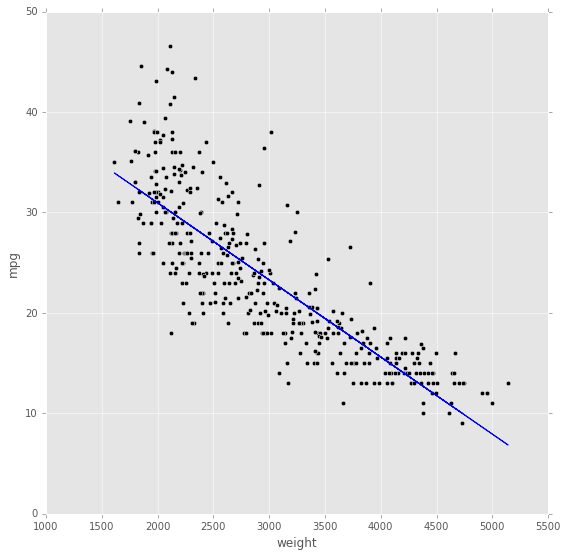

In [105]:
df.plot(kind="scatter",x="weight",y="mpg",figsize=(9,9),color="black")

# Plot regression line
plt.plot(df["weight"],      
         train_prediction,  
         color="blue")

((array([-2.9218026 , -2.63365901, -2.47116016, -2.35569541, -2.26506662,
         -2.18993277, -2.12544338, -2.06874358, -2.01800561, -1.97198606,
         -1.92979922, -1.89079106, -1.8544643 , -1.82043173, -1.78838568,
         -1.75807748, -1.72930318, -1.70189331, -1.67570551, -1.65061892,
         -1.62653011, -1.60334977, -1.58100027, -1.55941369, -1.53853025,
         -1.51829701, -1.49866692, -1.47959792, -1.46105224, -1.4429959 ,
         -1.42539813, -1.40823104, -1.39146921, -1.37508946, -1.35907055,
         -1.34339299, -1.32803884, -1.31299155, -1.2982358 , -1.28375744,
         -1.26954329, -1.25558111, -1.2418595 , -1.22836781, -1.21509608,
         -1.202035  , -1.18917582, -1.17651032, -1.1640308 , -1.15172997,
         -1.13960098, -1.12763737, -1.11583302, -1.10418213, -1.09267923,
         -1.08131913, -1.07009688, -1.05900781, -1.04804745, -1.03721157,
         -1.02649613, -1.01589727, -1.00541132, -0.99503477, -0.98476427,
         -0.97459661, -0.96452872, -0.

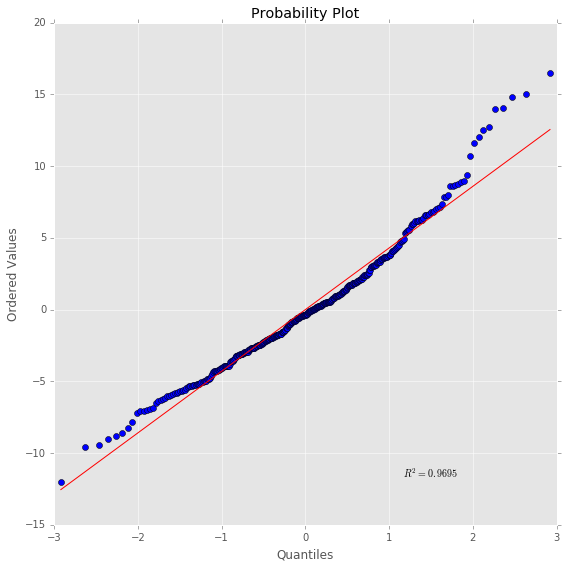

In [25]:
""" 
Q-Q plot
Residuals appear to follow a slightly non-linear pattern: 
the residuals are a bit away from the normality line on each end. 
This is an indication that simple straight line might not be sufficient 
to fully describe the relationship between weight and mpg
"""

plt.figure(figsize=(9,9))

stats.probplot(residuals, dist="norm", plot=plt)

In [106]:
# Root Mean Square Error
rmse = mean_squared_error(df["mpg"],train_prediction)**0.5

print("MSE:")
print(mean_squared_error(df["mpg"], train_prediction))
print("RMSE:")
print(RMSE)

MSE:
18.7809397346
RMSE:
4.94796050899


In [124]:
#displacement
# Initialize model
regression_model_d = linear_model.LinearRegression()

# Train the model using the auto-mpg data
regression_model_d.fit(X = pd.DataFrame(df["displacement"]),y = df["mpg"])

# Check trained model y-intercept
print("Intercept:")
print(regression_model_d.intercept_)

# Check trained model coefficients
print("Coefficient:")
print(regression_model_d.coef_)

print("R-Squared:")
print(regression_model_d.score(X = pd.DataFrame(df["displacement"]),y = df["mpg"]))

Intercept:
35.1747501543
Coefficient:
[-0.06028241]
R-Squared:
0.646742183426


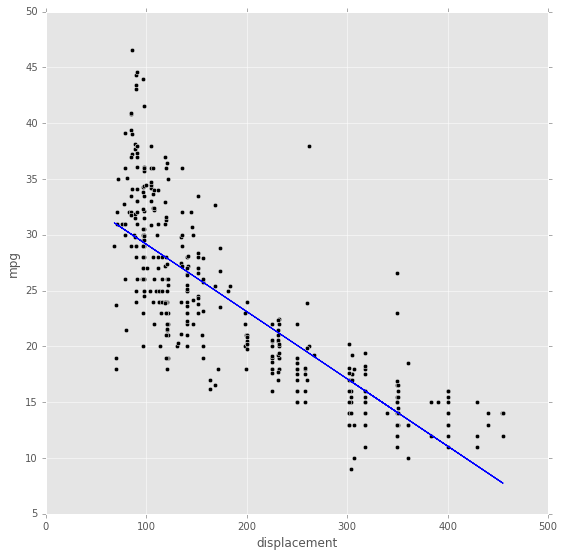

In [44]:
train_prediction_d = regression_model_d.predict(X = pd.DataFrame(df["displacement"]))

df.plot(kind="scatter",x="displacement",y="mpg",figsize=(9,9),color="black")

# Plot regression line
plt.plot(df["displacement"],      
         train_prediction_d,  
         color="blue")

In [134]:
#horsepower
# Initialize model
regression_model_h = linear_model.LinearRegression()

# Train the model using the auto-mpg data
regression_model_h.fit(X = pd.DataFrame(df["horsepower"]),y = df["mpg"])

# Check trained model y-intercept
print("Intercept:")
print(regression_model_h.intercept_)

# Check trained model coefficients
print("Coefficient:")
print(regression_model_h.coef_)

print("R-Squared:")
print(regression_model_h.score(X = pd.DataFrame(df["horsepower"]),y = df["mpg"]))

Intercept:
40.0113178711
Coefficient:
[-0.1581602]
R-Squared:
0.598229859666


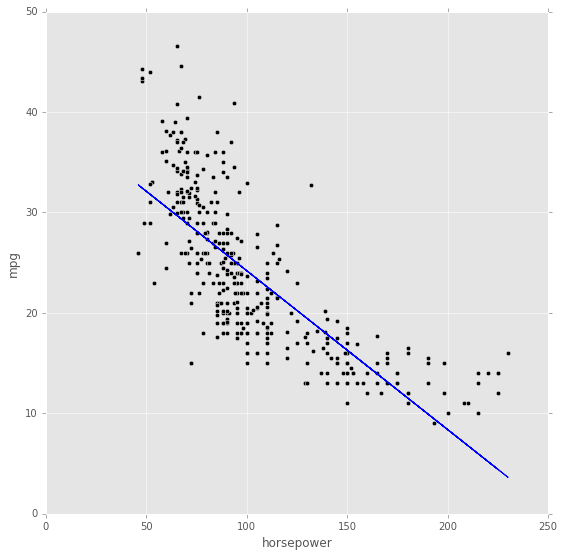

In [46]:
train_prediction_h = regression_model_h.predict(X = pd.DataFrame(df["horsepower"]))

df.plot(kind="scatter",x="horsepower",y="mpg",figsize=(9,9),color="black")

# Plot regression line
plt.plot(df["horsepower"],      
         train_prediction_h,  
         color="blue")

# Polynomial Regresseion

In [126]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([df["weight"],           # Include weight
                           df["weight"]**2]).T     # Include weight squared

# Train the model using the new_cars data
poly_model.fit(X = predictors, 
               y = df["mpg"])

# Check trained model y-intercept
print("Intercept:")
print(poly_model.intercept_)

# Check trained model coefficients
print("Coefficients:")
print(poly_model.coef_)

# Check R-squared
print("R-Squared:")
print(poly_model.score(X = predictors, y = df["mpg"]))

Intercept:
62.516652222
Coefficients:
[ -1.86423243e-02   1.71652679e-06]
R-Squared:
0.714788125827


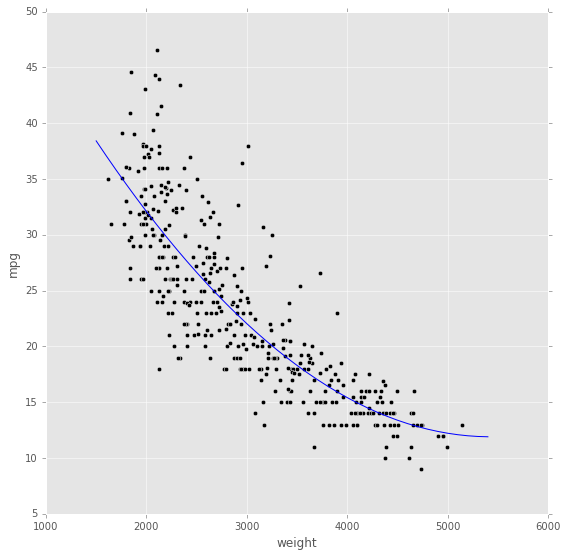

In [30]:
# Plot the curve from 1500 to 5500
poly_line_range = np.arange(1500, 5500, 100)

# Get first and second order predictors from range
poly_predictors = pd.DataFrame([poly_line_range,
                               poly_line_range**2]).T

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

df.plot(kind="scatter",
           x="weight",
           y="mpg",
           figsize=(9,9),
           color="black")

# Plot curve line
plt.plot(poly_line_range,   
         y_values,          
         color="blue")

In [112]:
preds = poly_model.predict(X=predictors)

print("MSE:")
print(mean_squared_error(df["mpg"], preds))
print("RMSE:")
print(mean_squared_error(df["mpg"],preds)**0.5)

MSE:
17.3797047875
RMSE:
4.16889731074


In [135]:
#horsepower
# Initialize model
poly_model2 = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors2 = pd.DataFrame([df["horsepower"],           # Include weight
                           df["horsepower"]**2]).T     # Include weight squared

# Train the model using the new_cars data
poly_model2.fit(X = predictors2, 
               y = df["mpg"])

# Check trained model y-intercept
print("Intercept:")
print(poly_model2.intercept_)

# Check trained model coefficients
print("Coefficients:")
print(poly_model2.coef_)

# Check R-squared
print("R-Squared:")
print(poly_model2.score(X = predictors2, y = df["mpg"]))

Intercept:
56.7812081604
Coefficients:
[-0.46256338  0.00121432]
R-Squared:
0.676573885233


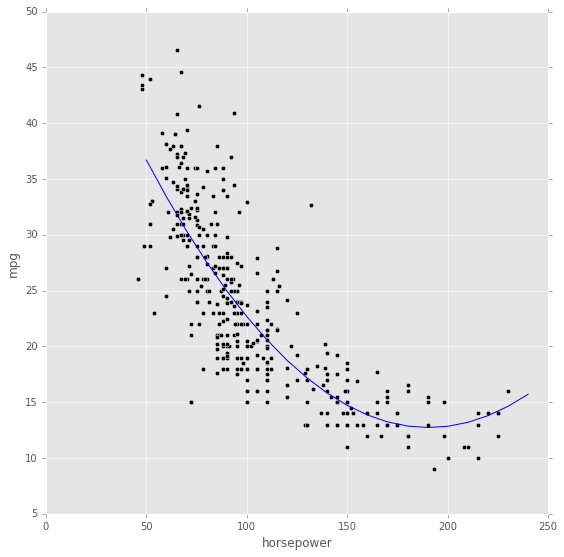

In [131]:
# Plot the curve from 50 to 250
poly_line_range2 = np.arange(50, 250, 10)

# Get first and second order predictors from range
poly_predictors2 = pd.DataFrame([poly_line_range2,
                               poly_line_range2**2]).T

# Get corresponding y values from the model
y_values = poly_model2.predict(X = poly_predictors2)

df.plot(kind="scatter",
           x="horsepower",
           y="mpg",
           figsize=(9,9),
           color="black")

# Plot curve line
plt.plot(poly_line_range2,   
         y_values,          
         color="blue")

In [132]:
preds2 = poly_model2.predict(X=predictors2)

print("MSE:")
print(mean_squared_error(df["mpg"], preds2))
print("RMSE:")
print(mean_squared_error(df["mpg"],preds2)**0.5)

MSE:
19.7083323109
RMSE:
4.43940675213


# Multiple Regression

In [136]:
# Weight-Horsepower
# Initialize model
multi_reg_model = linear_model.LinearRegression()

# Train the model using the mtcars data
multi_reg_model.fit(X = df.ix[:,["weight","horsepower"]], y = df["mpg"])

# Check trained model y-intercept
print("Intercept:")
print(multi_reg_model.intercept_)

# Check trained model coefficients
print("Coefficients:")
print(multi_reg_model.coef_)

# Check R-squared
print("R-Squared:")
print(multi_reg_model.score(X = df.ix[:,["weight","horsepower"]], y = df["mpg"]))

print("MSE:")
print(mean_squared_error(df["mpg"], multi_reg_model.predict(df.ix[:,["weight","horsepower"]])))

Intercept:
45.8100384797
Coefficients:
[-0.00593281 -0.04479699]
R-Squared:
0.704088271106
MSE:
18.0317124112


In [137]:
# Weight-Acceleration
# Initialize model
multi_reg_model = linear_model.LinearRegression()

# Train the model using the mtcars data
multi_reg_model.fit(X = df.ix[:,["weight","acceleration"]], y = df["mpg"])

# Check trained model y-intercept
print("Intercept:")
print(multi_reg_model.intercept_)

# Check trained model coefficients
print("Coefficients:")
print(multi_reg_model.coef_)

# Check R-squared
print("R-Squared:")
print(multi_reg_model.score(X = df.ix[:,["weight","acceleration"]], y = df["mpg"]))

print("MSE:")
print(mean_squared_error(df["mpg"], multi_reg_model.predict(df.ix[:,["weight","acceleration"]])))

Intercept:
41.399828302
Coefficients:
[-0.00733564  0.25081589]
R-Squared:
0.698259506182
MSE:
18.3868947259


# Polynomial Regression for Weight-Horsepower

In [116]:
# Initialize model
multi_reg_model_poly = linear_model.LinearRegression()

# Include squared terms
poly_predictors = pd.DataFrame([df["weight"],
                                df["horsepower"],
                                df["weight"]**2,
                                df["horsepower"]**2]).T

# Train the model using the mtcars data
multi_reg_model_poly.fit(X = poly_predictors, y = df["mpg"])

print("Intercept:")
print(multi_reg_model_poly.intercept_)
print("Coefficients:")
print(multi_reg_model_poly.coef_)

# Check R-squared
print("R-Squared")
print( multi_reg_model_poly.score(X = poly_predictors,y = df["mpg"]) )

# Check RMSE
print("RMSE:")
print(mean_squared_error(multi_reg_model_poly.predict(poly_predictors), df["mpg"])**0.5)

print("MSE:")
print(mean_squared_error(df["mpg"], multi_reg_model_poly.predict(poly_predictors)))

Intercept:
65.0366155865
Coefficients:
[ -1.34560904e-02  -2.01544497e-01   1.36052598e-06   5.26272525e-04]
R-Squared
0.744883214628
RMSE:
3.94281965936
MSE:
15.5458268663


# Regularization - Ridge/Lasso

In [51]:
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [55]:
#removing car_name from DataFrame
df_reg=df.drop('car_name', axis=1)
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
dtypes: float64(4), int64(4)
memory usage: 28.0 KB


In [93]:
y = df_reg.mpg
# Drop the column with the dependent variable (mpg)
X = df_reg.drop(['mpg'], axis=1).astype('float64')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 7 columns):
cylinders       398 non-null float64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null float64
origin          398 non-null float64
dtypes: float64(7)
memory usage: 24.9 KB


In [67]:
# Generate array of alphas from very small to very big to cover all scenarios
# From the null model containing only the intercept to the least squares fit
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([  5.00000000e+09,   3.78231664e+09,   2.86118383e+09,
         2.16438064e+09,   1.63727458e+09,   1.23853818e+09,
         9.36908711e+08,   7.08737081e+08,   5.36133611e+08,
         4.05565415e+08,   3.06795364e+08,   2.32079442e+08,
         1.75559587e+08,   1.32804389e+08,   1.00461650e+08,
         7.59955541e+07,   5.74878498e+07,   4.34874501e+07,
         3.28966612e+07,   2.48851178e+07,   1.88246790e+07,
         1.42401793e+07,   1.07721735e+07,   8.14875417e+06,
         6.16423370e+06,   4.66301673e+06,   3.52740116e+06,
         2.66834962e+06,   2.01850863e+06,   1.52692775e+06,
         1.15506485e+06,   8.73764200e+05,   6.60970574e+05,
         5.00000000e+05,   3.78231664e+05,   2.86118383e+05,
         2.16438064e+05,   1.63727458e+05,   1.23853818e+05,
         9.36908711e+04,   7.08737081e+04,   5.36133611e+04,
         4.05565415e+04,   3.06795364e+04,   2.32079442e+04,
         1.75559587e+04,   1.32804389e+04,   1.00461650e+04,
         7.59955541e+03,

In [69]:
ridge = Ridge(normalize=True)
coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

np.shape(coefs)

(100, 7)

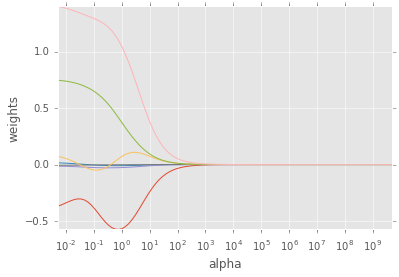

In [70]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [117]:
X_train, X_test , y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5, random_state=1)

# alpha=4
ridge2 = Ridge(alpha=4, normalize=True)
# Fit a ridge regression on the training data
ridge2.fit(X_train, y_train) 
# Use this model to predict the test data
pred2 = ridge2.predict(X_test) 
# Print coefficients
print("Coefficients:")
print(pd.Series(ridge2.coef_, index=X.columns)) 
# Calculate the test MSE
print("MSE:")
print(mean_squared_error(y_test, pred2)) 

Coefficients:
cylinders      -0.410747
displacement   -0.007192
horsepower     -0.018083
weight         -0.000958
acceleration    0.114404
model_year      0.172414
origin          0.665482
dtype: float64
MSE:
25.1184257377


In [118]:
#alpha=10**10
ridge3 = Ridge(alpha=10**10, normalize=True)
# Fit a ridge regression on the training data
ridge3.fit(X_train, y_train) 
# Use this model to predict the test data
pred3 = ridge3.predict(X_test) 
# Print coefficients
print("Coefficients:")
print(pd.Series(ridge3.coef_, index=X.columns)) 
# Calculate the test MSE
print("MSE:")
print(mean_squared_error(y_test, pred3)) 

Coefficients:
cylinders      -3.601755e-10
displacement   -6.271197e-12
horsepower     -1.584508e-11
weight         -7.769244e-13
acceleration    1.198951e-10
model_year      1.163323e-10
origin          5.391499e-10
dtype: float64
MSE:
62.9643149988


In [119]:
# alpha=0
ridge4 = Ridge(alpha=0, normalize=True)
# Fit a ridge regression on the training data
ridge4.fit(X_train, y_train) 
# Use this model to predict the test data
pred = ridge4.predict(X_test)
# Print coefficients
print("Coefficients:")
print(pd.Series(ridge4.coef_, index=X.columns))
# Calculate the test MSE
print("MSE:")
print(mean_squared_error(y_test, pred)) 

Coefficients:
cylinders      -0.789514
displacement    0.026359
horsepower     -0.002554
weight         -0.007261
acceleration    0.219371
model_year      0.747693
origin          1.549069
dtype: float64
MSE:
11.1667640614


In [75]:
# Using Cross-Validation, find the best alpha that results in the smallest cross-validation error
ridgecv = RidgeCV(alphas=alphas, scoring='mean_squared_error', normalize=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.0050000000000000001

In [120]:
# alpha=0.005
ridge5 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge5.fit(X_train, y_train)
print("MSE:")
print(mean_squared_error(y_test, ridge5.predict(X_test)))

MSE:
11.0679901156


In [123]:
ridge5.fit(X, y)
print("R-Squared:")
print(ridge5.score(X,y))
print("MSE:")
print(mean_squared_error(y, ridge5.predict(X)))
pd.Series(ridge5.coef_, index=X.columns)

R-Squared:
0.820740461486
MSE:
10.9233806227


cylinders      -0.369913
displacement    0.015246
horsepower     -0.014051
weight         -0.006313
acceleration    0.073619
model_year      0.746443
origin          1.400749
dtype: float64

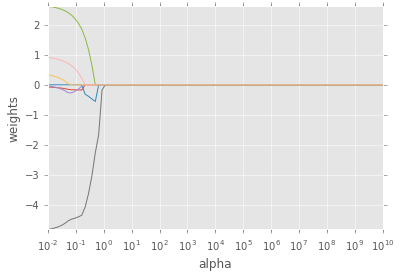

In [79]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [122]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

print("MSE:")
print(mean_squared_error(y_test, lasso.predict(X_test)))
print("R-Squared:")
print(lasso.score(X_test,y_test))

pd.Series(lasso.coef_, index=X.columns)

MSE:
11.0651128828
R-Squared:
0.824229003841


cylinders      -0.599436
displacement    0.019692
horsepower     -0.002088
weight         -0.006935
acceleration    0.196108
model_year      0.740242
origin          1.459347
dtype: float64

# Results Overview

Simple Linear Regression (Best Results):
Model with variable weight
R-Squared:	0.691792980034
MSE:		18.7809397346

Polynomial Regression (Best Results):
Model with variable weight
R-Squared:	0.714788125827
MSE:		17.3797047875

Multiple Regression (Best Results):
Model with variables weight and horsepower
R-Squared:	0.704088271106
MSE:		18.0317124112

Polynomial Multiple Regression (Best Results):
Model with variables weight and horsepower
R-Squared:	0.744883214628
MSE:		15.5458268663

Regularization with Cross-Validation:
Ridge(a=0.005):
Performs L2 regularization, adds penalty equivalent to square of the magnitude of coefficients
Using Cross-Validation, the best alpha that results 
in the smallest cross-validation error was a=0.05
R-Squared:	0.820740461486
MSE:		10.9233806227

Lasso:
Performs L1 regularization, adds penalty equivalent to absolute value of the magnitude of coefficients
R-Squared:	0.824229003841
MSE:		11.0651128828